**Apply Cost Function and Gradient Descent on simple linear regression.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Student_Performance.csv')

In [5]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [6]:
X = dataset[['Hours Studied']].values
y = dataset[['Performance Index']].values

In [7]:
theta0 = 1   # intercept
theta1 = 0   # slope
learning_rate = 0.01
iterations = 1000
m = len(X)

In [8]:
def compute_cost(X, y, theta0, theta1):
    predictions = theta0 + theta1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [11]:
def gradient_descent(X, y, theta0, theta1, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = theta0 + theta1 * X
        error = predictions - y

        theta0 = theta0 - (learning_rate / m) * np.sum(error)
        theta1 = theta1 - (learning_rate / m) * np.sum(error * X)

        cost = compute_cost(X, y, theta0, theta1)
        cost_history.append(cost)

    return theta0 , theta1 , cost_history

In [12]:
theta0_final, theta1_final, cost_history = gradient_descent(X, y, theta0, theta1, learning_rate, iterations)

In [13]:
y_pred = theta0_final + theta1_final * X

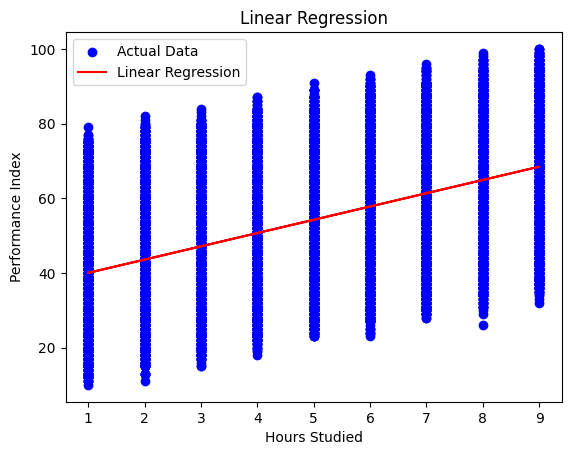

In [14]:
plt.scatter(X, y, label = 'Actual Data', color = 'blue')
plt.plot(X, y_pred, color = 'red', label = 'Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Linear Regression')
plt.legend()
plt.show()

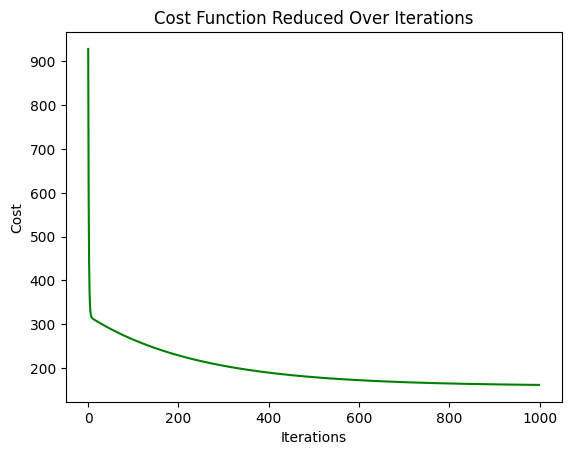

In [15]:
plt.plot(range(iterations), cost_history, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Reduced Over Iterations')
plt.show()

In [16]:
print(f"Final Theta0 (intercept): {theta0_final}")
print(f"Final Theta1 (slope): {theta1_final}")

Final Theta0 (intercept): 36.46140913099345
Final Theta1 (slope): 3.5543836384824967


**Apply Cost Function and Gradient Descent on multi linear regression.**

In [23]:
X_multi = dataset[['Hours Studied', 'Previous Scores', 'Sleep Hours']].values
y_multi = dataset[['Performance Index']].values.reshape(-1, 1)

In [26]:
X_multi = np.c_[np.ones((X_multi.shape[0], 1)), X_multi]

In [27]:
theta_multi = np.zeros((X_multi.shape[1], 1))
learning_rate = 0.01
iterations = 1000

In [28]:
def compute_cost_multi(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [37]:
def gradient_descent_multi(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        theta = theta - (learning_rate / m) * X.T.dot(X.dot(theta) - y)
        cost_history.append(compute_cost_multi(X, y, theta))

    return theta, cost_history

In [38]:
theta_final_multi, cost_history_multi = gradient_descent_multi(X_multi, y_multi, theta_multi, learning_rate, iterations)

In [39]:
print("\nFinal Theta Values (Including Bias Term) for Multiple Regression:")
print(theta_final_multi.flatten())


Final Theta Values (Including Bias Term) for Multiple Regression:
[13.79296986 13.79296986 13.79296986  2.77310546]


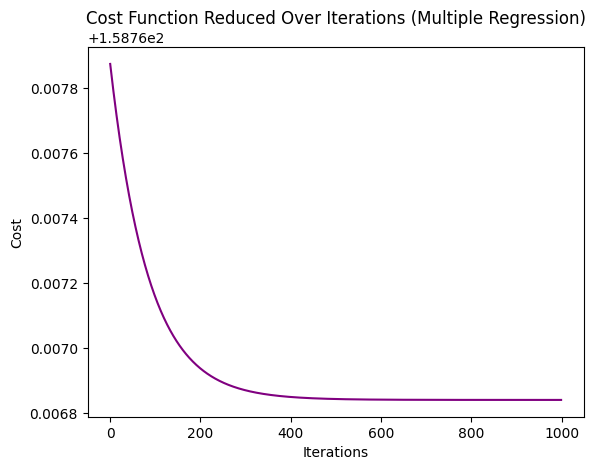

In [40]:
plt.plot(cost_history_multi, color='purple')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Reduced Over Iterations (Multiple Regression)")
plt.show()

In [41]:
y_pred_multi = X_multi.dot(theta_final_multi)

In [42]:
print("\nFirst 5 Predictions vs Actual Performance Index:")
df_predictions_multi = pd.DataFrame({"Predicted": y_pred_multi.flatten(), "Actual": y_multi.flatten()})
print(df_predictions_multi.head())


First 5 Predictions vs Actual Performance Index:
   Predicted  Actual
0  60.790648      91
1  52.471331      65
2  63.563753      45
3  55.244437      36
4  60.790648      66
